<a href="https://colab.research.google.com/github/ethanpnguyen/ds4e/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Digit Recognition:
Can you predict digits from handwritten pictures?

## Initialize

In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
dfDgt = pd.read_csv('/content/handwriting_digits.csv')
dfDgt.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dfDgt.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
# Define target and features

y = dfDgt.loc[:, 'label']
X = scale(dfDgt.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Visualize Data

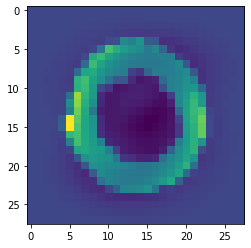

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X[1].reshape((28, 28)))

In [6]:
y[1]

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


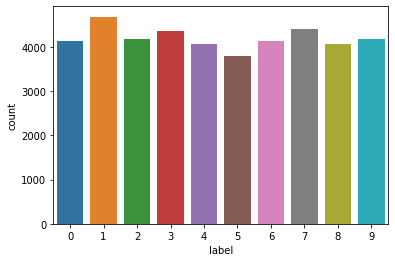

In [7]:
import seaborn as sns

sns.countplot(y)

## Predict Digit from Handwriting

In [8]:
%%time

from sklearn.svm import SVC

mdlSvmDgt = SVC()
mdlSvmDgt.fit(X_train, y_train)
y_test_pred = mdlSvmDgt.predict(X_test)

print('Classification Report (Support Vector Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       853
           1       0.98      0.99      0.98       940
           2       0.92      0.98      0.95       835
           3       0.96      0.94      0.95       873
           4       0.96      0.96      0.96       829
           5       0.96      0.95      0.95       731
           6       0.97      0.97      0.97       800
           7       0.94      0.97      0.96       850
           8       0.97      0.94      0.96       846
           9       0.96      0.93      0.94       843

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

CPU times: user 5min 11s, sys: 593 ms, total: 5min 11s
Wall time: 5min 55s


In [9]:
%%time

from sklearn.neural_network import MLPClassifier

mdlNntDgt = MLPClassifier()
mdlNntDgt.fit(X_train, y_train)
y_test_pred = mdlNntDgt.predict(X_test)

print('Classification Report (Neural Network Classifier):')
print(classification_report(y_test, y_test_pred))
# print(mdlNntDgt.score(X_test, y_test))

Classification Report (Neural Network Classifier):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       853
           1       0.99      0.99      0.99       940
           2       0.97      0.96      0.96       835
           3       0.97      0.96      0.97       873
           4       0.96      0.98      0.97       829
           5       0.96      0.95      0.96       731
           6       0.98      0.98      0.98       800
           7       0.94      0.98      0.96       850
           8       0.97      0.95      0.96       846
           9       0.96      0.95      0.96       843

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

CPU times: user 1min 2s, sys: 23.9 s, total: 1min 26s
Wall time: 52.7 s


In [16]:
# Load Data for Scoring
X_score = pd.read_csv('/content/handwriting_digits_score.csv')
X_score = scale(X_score)

In [ ]:
# View handwritten images
plt.figure(figsize = (12,10))
col , row = 10, 4

for i in range(col*row):
  plt.subplot(row, col, i+1)
  plt.imshow(X_score[i].reshape((28, 28)))
plt.show()

In [ ]:
# Predict handwritten images
for i in range(col*row):
  if np.mod(i, col) == 0:
    print('\n')
  print(mdlNntDgt.predict(X_score)[i], end = ' ')

## Build Deep Neural Network

In [ ]:
%%time

from sklearn.neural_network import MLPClassifier

mdlDnnDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDnnDgt.fit(X_train, y_train)
y_test_pred = mdlNntDgt.predict(X_test)

print('Classification Report (Deep Neural Classifier):')
print(classification_report(y_test, y_test_pred))

In [21]:
# Cross-validate models across 5 different experiments

from sklearn.model_selection import cross_val_score

cross_val_score(mdlDnnDgt, X, y, cv=5)

array([0.96809524, 0.96880952, 0.96952381, 0.97      , 0.97083333])